<p class="h2 display-4 text-center">中国矿业大学（北京）</p>
<p class="h2 display-4 text-center">2019-2020学年第2学期本科课程线上考核封面</p>
<hr class="my-4">
<p class="h4">课程名称：商业数据分析与挖掘</p>
<p class="h4">课程性质：专业必修课</p>
<p class="h4">任课教师：李岩</p>

<p class="h4">学院班级：</p>

<p class="h4">姓名：</p>

董慧媛

<p class="h4">学号：</p>

1710520213

<hr class="my-4">
<p class="h4">评分区域（由阅卷老师填写）</p>
<p class="h2">总分：</p>
<p class="h2">评分人：</p>

![leesignatureSmall.gif](attachment:leesignatureSmall.gif)

<hr class="my-4">
<p class="text text-danger text-center" style="font-size:20pt">答题要求</p>

1. 答题时间<font color="red"><strong>48小时</strong></font>，从2020年5月23日08:00 $\to$ 2020年5月25日08:00。
2. 答题完毕后的上传地址是 [http://calcures.com:9001/assign](http://calcures.com:9001/assign)
3. 题目具有研究性质，每道题**没有唯一**的答案，综合运用所学知识尽可能得到更好的结果。
4. 每道题的解答须写出**必要**的步骤和过程，在每道题目后面增加单元格解答。
5. 凡是涉及到`random_state`的，`random_state`的取值为个人学号的**后三位**构成的整数。
6. 凡是涉及到划分训练集、检验集的，检验集的比例为$(\text{学号}\textbf{后三位}\text{构成的整数}+100)/1000$。例如，如果学号**后三位**是202，则检验集的比例是$(202+100)/1000=0.302$

<hr class="my-4">

# COVID19分析（计10分）

<p class="lead">现有一份中国大陆新冠肺炎疫情（COVID19）的发病和治愈数据，数据表名称为<code>ChinaCovid19.csv</code>，包含下述信息：</p>

属性|描述
---|---
Province/State|省/直辖市
Country|国家
Confirmed|确诊累计数
Deaths|死亡累计数
Recovered|治愈累计数
ObservationDate|观测日期

<p class="lead">根据上述数据表，回答下列问题：</p>

- 绘制全国每日**新增**确诊数、**新增**治愈数随时间的变化趋势。（**5分**）
- 选用合适的形式可视化**对比**展示全国各个省/直辖市**最终**的确诊数、死亡数、治愈数。（**5分**）

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [172]:
from pandas import DataFrame
covid = pd.read_csv('./ChinaCovid19.csv')
covid.head()

,Province/State,Country,Confirmed,Deaths,Recovered,ObservationDate
0,Anhui,Mainland China,1,0,0,22-01-2020
1,Anhui,Mainland China,9,0,0,23-01-2020
2,Anhui,Mainland China,15,0,0,24-01-2020
3,Anhui,Mainland China,39,0,0,25-01-2020
4,Anhui,Mainland China,60,0,0,26-01-2020


- 绘制全国每日**新增**确诊数、**新增**治愈数随时间的变化趋势。（**5分**）

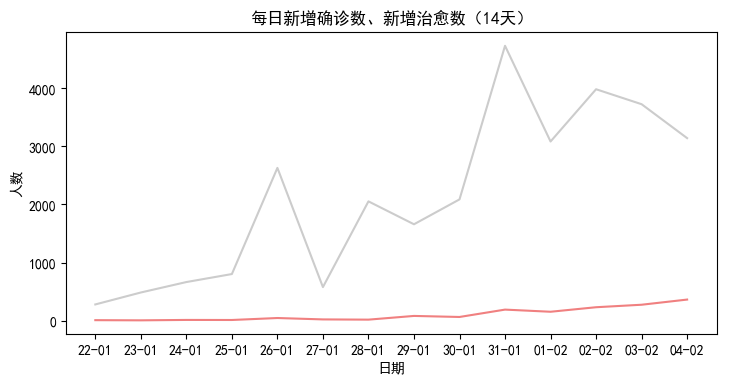

In [236]:
# 以日期为x
# 以新增确诊、新增治愈为y
# 计算每天新增确诊、新增治愈的总和
# excel 22-01-2020至15-03-2020 共54天

# 显示多少天，最多53天，不能超过表格中统计的天数
showDays = 14

x_date = []
y0_disease = []
y1_disease_to_health = []

currentDate = ""
currentDayDisease = 0
currentDayDiseaseToHealth = 0

p = re.compile('-2020') # 优化日期显示
for days in range(0,showDays+2):
    currentDate = ""
    currentDayDisease = 0
    currentDayDiseaseToHealth = 0
    for idx, row in covid.iterrows():
        if idx == days:
            currentDate = row['ObservationDate']
            x_date.append(p.sub('',currentDate))
        if row['ObservationDate'] == currentDate:
            currentDayDisease += row['Confirmed']
            currentDayDiseaseToHealth += row['Recovered']
    y0_disease.append(currentDayDisease)
    y1_disease_to_health.append(currentDayDiseaseToHealth)

y0_delta_disease = []
y1_delta_disease_to_health = []

# 用后一天减去前一天计算新增确诊/新增治愈数
for i in range(len(y0_disease)):
    if i > 1:
        y0_delta_disease.append(y0_disease[i] - y0_disease[i-1])
        y1_delta_disease_to_health.append(y1_disease_to_health[i] - y1_disease_to_health[i-1])

plt.figure(figsize=(showDays * 0.6,4),dpi=100)
plt.xticks(np.arange(len(x_date)),x_date)
plt.plot(y0_delta_disease,label="",color="#CCCCCC")
plt.plot(y1_delta_disease_to_health,label="",color="#F08080")
plt.title('每日新增确诊数、新增治愈数（%d天）'%showDays)
plt.xlabel('日期')
plt.ylabel('人数')
plt.show()


- 选用合适的形式可视化**对比**展示全国各个省/直辖市**最终**的确诊数、死亡数、治愈数。（**5分**）

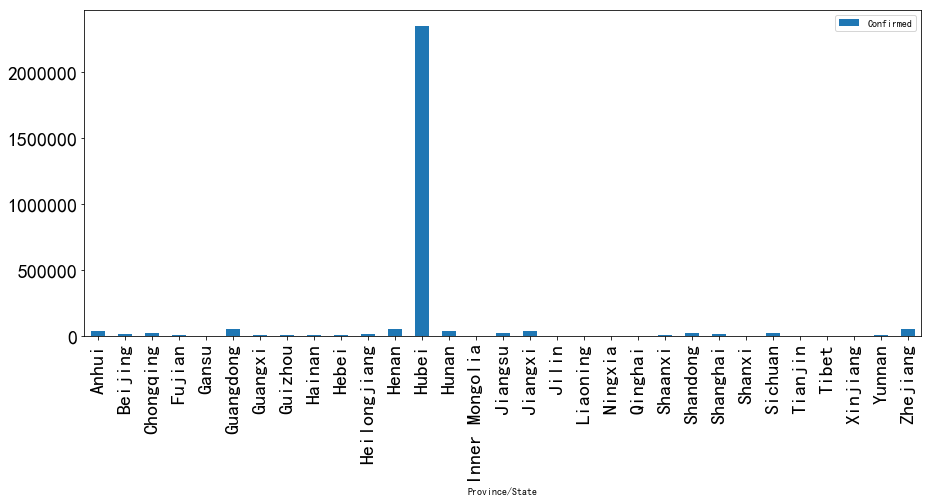

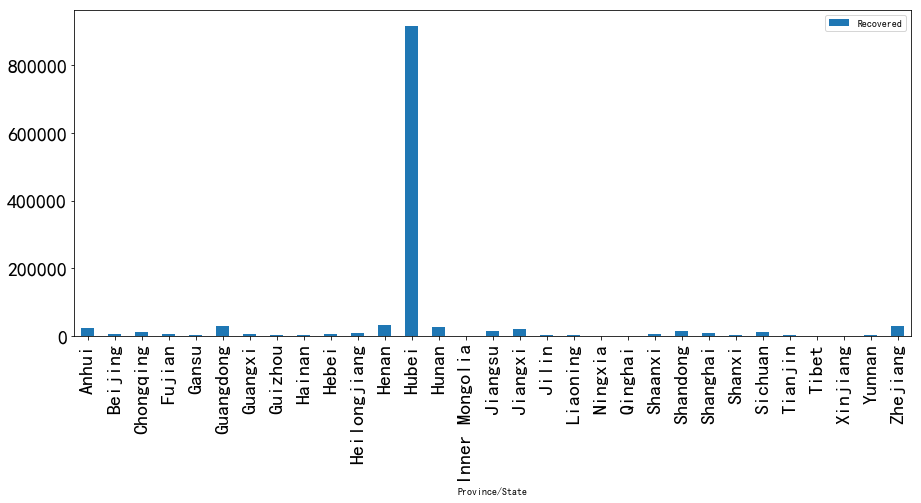

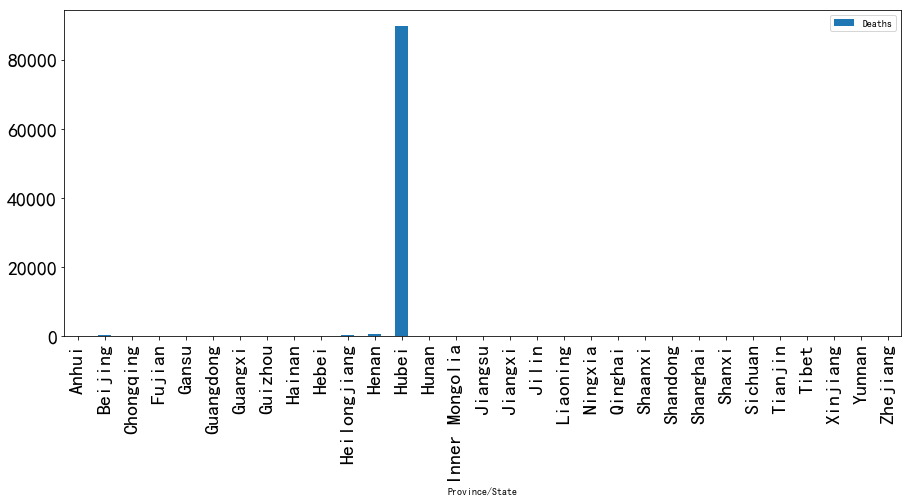

In [266]:
Confirmed = pd.DataFrame(covid.groupby('Province/State')['Confirmed'].sum())
Confirmed_bar = Confirmed.plot(kind='bar',stacked = True,figsize=(15,6), fontsize=20)

Recovered = pd.DataFrame(covid.groupby('Province/State')['Recovered'].sum())
Recovered_bar = Recovered.plot(kind='bar',stacked = True,figsize=(15,6), fontsize=20)

Deaths = pd.DataFrame(covid.groupby('Province/State')['Deaths'].sum())
Deaths_bar = Deaths.plot(kind='bar',stacked = True,figsize=(15,6), fontsize=20)


# 公司财务状况分类（计20分）

<p class="lead">评估公司的财务状况对于公司的经营和投资来说都非常重要。公司的财务状况不仅受到财务指标的影响，同时还受到非财务指标的影响。作为一名经济管理领域的研究人员，你收集了一些公司在一系列年份中的财务指标和非财务指标数据，以及公司在相应年份中的财务状况，数据表的名字为<code>FinancialStatus.csv</code>。该数据表中包含如下信息：</p>

属性|描述
---|---
Company|公司编号，唯一标识
Time|统计的年度，每个公司对应14个年度，取值$1\sim14$
FinancialStatus|财务状况，$\gt -0.5$财务正常，$\leq -0.5$财务困难
$x1\sim x83$|各种财务指标和非财务指标的取值
$x80$|标称型属性

<p class="lead">根据该数据表，回答下列问题：</p>

- 有多少家公司出现了财务困难？在所有样本公司中的占比是多少？（用可视化的方式展示）（**5分**）
- 哪些属性与公司出现财务困难的关系最为密切？（**5分**）
- 请建立合适的分类模型，以预测什么样的公司会陷入财务困境。（**10分**）

In [37]:
financial=pd.read_csv('C:/Users/170910/Desktop/FinancialStatus.csv')
f1=financial.loc[(financial['FinancialStatus']<=-0.5)]
f1.shape[0]

136

ValueError: 'explode' must be of length 'x'

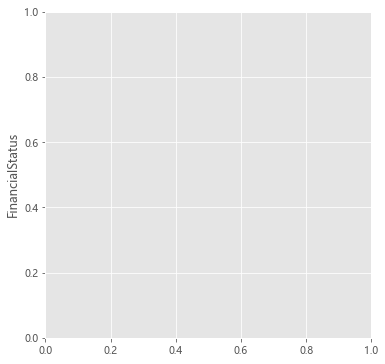

In [46]:
#f2=financial.loc[(financial['FinancialStatus']>-0.5)]
#fclass=['f1','f2']
for item in financial['FinancialStatus']:

    if  item<=-0.5:

        item= 1

    else:

        item= 2

fSe = financial['FinancialStatus'].value_counts()
fSe.rename({1:'困难',2:'正常'},inplace=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.style.use('ggplot')
fSe.plot(kind='pie',explode=[0,0],autopct='%.2f%%',figsize=(12,6))


# 人力资源管理问题（计35分）

<p class="lead">作为一家公司的人力资源部门主管，需要追踪和评估员工的工作绩效，为企业的组织管理决策提供支持依据。公司的人力资源管理系统可以记录员工的绩效评价和工作行为等信息。该系统记录的员工的信息包含如下内容：</p>

属性|描述
---|---
Employee Name|员工姓名
EmpID|员工ID，唯一标识
FromDiversityJobFairID|员工是否从Diversity job fair招募的，1是，0否
PayRate|员工的小时工资
Termd|员工是否离职，1是，0否
Position|员工的职位名称
State|员工居住的州名
Zip|员工的邮政编码
DOB|员工的出生日期
Sex|员工的姓名，M男性，F女性
MaritalDesc|员工的婚姻状况
CitizenDesc|员工是美国公民（Citizen）还是合格的非公民（Eligible NonCitizen）
HispanicLatino|员工是否是西班牙/拉丁裔
RaceDesc|员工所属的民族
DateofHire|员工被雇佣的日期
DateofTermination|员工离职的日期
TermReason|员工离职的原因
EmploymentStatus|员工的雇佣状态
Department|员工所在的部门
ManagerName|员工的直管经理姓名
ManagerID|经理的ID，唯一标识
RecruitmentSource|员工被招募的渠道名称
PerformanceScore|员工的绩效，分为Fully Meets, Partially Meets, PIP[<sup>1</sup>](#fn1), Exceeds[<sup>2</sup>](#fn2)
EngagementSurvey|上次员工的敬业度调查的结果
EmpSatisfaction|员工对工作的满意度，$1\sim5$得分
SpecialProjectsCount|员工在过去的6个月中参与的特殊项目的数量
LastPerformanceReviewDate|员工上次绩效评价的日期
DaysLateLast30|员工在过去30天中迟到的次数

<span id="fn1">1: Performance Improvement Plan，员工绩效提升计划，即要求在一段时间内工作绩效必须提到到一定的水平，否则就将被解雇</span><br/>
<span id="fn2">2: 超过设定的标准，表明工作绩效优异</span>

<p class="lead">员工的相关信息从系统中导出，形成的数据表为<code>HumanResourceData.csv</code>。根据该数据表，回答下列问题：</p>

- 该公司的员工整体具有怎样的特征？（包括性别、年龄、民族、婚姻状况等的描述性统计、分布等）（**5分**）
- 不同经理管辖下的员工在工作绩效、工资水平方面有差异吗？（**10分**）
- 要保证公司员工组成最大程度的多元化，应当着重从哪个渠道招募员工？（**5分**）
- 公司的工资发放公平吗？（**5分**）
- 能否建立一套**可解释**的规则，预测什么样的员工会离职？（**10分**）

# 在线零售营销（计35分）

<p class="lead">假设你是一家在线零售企业的销售部门主管。你从公司的销售系统中导出一份顾客的购买记录表，名称为<code>OnlineRetail.csv</code>。该数据表中包含如下信息：</p>

属性|描述
---|---
InvoiceNo|发票编号[<sup>1</sup>](#fn3)
StockCode|商品编码
Description|商品名称
Quantity|购买数量
InvoiceDate|发票日期
UnitPrice|商品单价
CustomerID|顾客ID

<span id="fn3">1: 前面带有C，表示被取消的订单。</span>

<p class="lead">根据该数据表，回答下列问题：</p>

- 哪个商品购买的数量最多？每个顾客平均消费多少？（**5分**）
- 为了更好的促销和推荐商品，你想知道顾客会经常一起购买哪些商品，你将如何得到这样的信息？（**15分**）
- 为了对顾客更好的进行分组管理，你希望借助RFM模型对顾客进行划分，建立什么样的模型能够得到最好的划分结果？并总结每个客户组的特征。（**15分**）